In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv('MRTSSM448USN.csv', parse_dates=True, index_col='DATE')

In [3]:
df.sample(5)

,MRTSSM448USN
DATE,
2009-10-01,17053.0
2005-01-01,12046.0
2001-02-01,11450.0
2017-10-01,20454.0
1994-02-01,7902.0


In [4]:
df.columns = ['Sales']

In [5]:
df.sample(5)

,Sales
DATE,
2005-11-01,18402.0
2012-06-01,18717.0
2021-02-01,15910.0
2020-02-01,19106.0
2017-02-01,18033.0


<Axes: xlabel='DATE'>

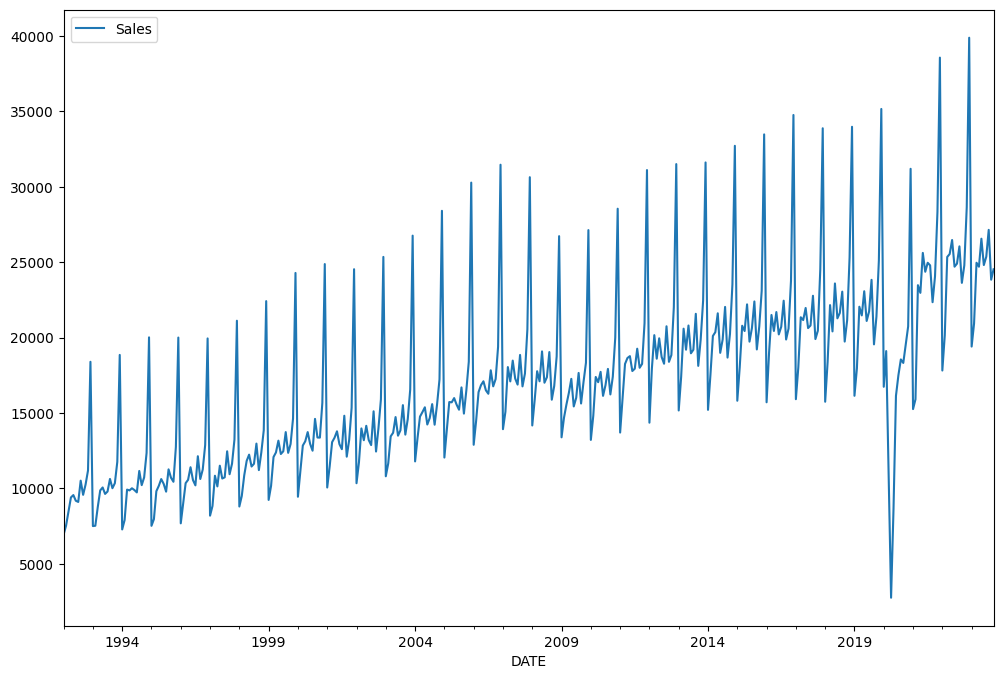

In [6]:
df.plot(figsize=(12, 8))

In [7]:
len(df)

382

In [8]:
test_data_size = 24

In [9]:
test_data_start_index = len(df) - test_data_size

In [10]:
test_data_start_index

358

In [11]:
train_data = df[:test_data_start_index]
test_data = df[test_data_start_index:]

In [12]:
len(train_data)

358

In [13]:
len(test_data)

24

In [14]:
scaler = MinMaxScaler()

In [15]:
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

In [16]:
length = 12
batch_size = 2
n_features = 1 

In [17]:
train_data_generator = TimeseriesGenerator(train_data_scaled, train_data_scaled, length=length, batch_size=batch_size)
test_data_generator = TimeseriesGenerator(test_data_scaled, test_data_scaled, length=length, batch_size=batch_size)

In [18]:
model = Sequential()

In [19]:
model.add(LSTM(128, activation='relu', input_shape=(length, n_features)))

model.add(Dense(1))

In [20]:
model.compile(optimizer='adam', loss='mse')

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 66689 (260.50 KB)
Trainable params: 66689 (260.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [23]:
model.fit(train_data_generator, epochs=30, validation_data=test_data_generator, callbacks=[early_stop])

Epoch 1/30

173/173 [==============================] - 4s 9ms/step - loss: 0.0242 - val_loss: 0.0928
Epoch 2/30
173/173 [==============================] - 1s 7ms/step - loss: 0.0174 - val_loss: 0.0372
Epoch 3/30
173/173 [==============================] - 1s 7ms/step - loss: 0.0174 - val_loss: 0.0259
Epoch 4/30
173/173 [==============================] - 1s 7ms/step - loss: 0.0144 - val_loss: 0.0107
Epoch 5/30
173/173 [==============================] - 1s 7ms/step - loss: 0.0091 - val_loss: 0.0154
Epoch 6/30
173/173 [==============================] - 1s 7ms/step - loss: 0.0065 - val_loss: 0.0115
Epoch 7/30
173/173 [==============================] - 1s 7ms/step - loss: 0.0066 - val_loss: 0.0096
Epoch 8/30
173/173 [==============================] - 1s 7ms/step - loss: 0.0065 - val_loss: 5.4363e-04
Epoch 9/30
173/173 [==============================] - 1s 7ms/step - loss: 0.0058 - val_loss: 0.0144
Epoch 10/30
173/173 [==============================] - 1s 7ms/step - loss: 0.0055 - val_loss: 0

In [24]:
losses = pd.DataFrame(model.history.history)

<Axes: >

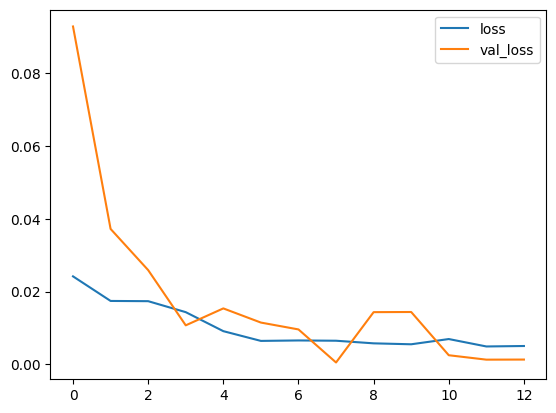

In [25]:
losses.plot()

In [26]:
all_predictions = []

In [27]:
first_batch_to_be_evaluated = train_data_scaled[-length:]

In [28]:
current_batch = first_batch_to_be_evaluated.reshape((1, length, n_features))

In [29]:
for i in range(len(test_data)):
    
    current_prediction = model.predict(current_batch)[0]
    
    all_predictions.append(current_prediction)
    
    current_batch = np.append(current_batch[:, 1:, :], [[current_prediction]], axis=1)

1/1 [==============================] - 0s 29ms/step


In [30]:
test_data['LSTM Predictions'] = scaler.inverse_transform(all_predictions)

C:\Users\Somenath\AppData\Local\Temp\ipykernel_20056\3602157217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['LSTM Predictions'] = scaler.inverse_transform(all_predictions)


In [31]:
test_data.sample(5)

,Sales,LSTM Predictions
DATE,,
2022-05-01,26470.0,25862.887083
2022-08-01,26049.0,25403.942242
2023-04-01,24700.0,24676.252253
2023-08-01,27143.0,26195.195676
2022-09-01,23629.0,23491.966331


<Axes: xlabel='DATE'>

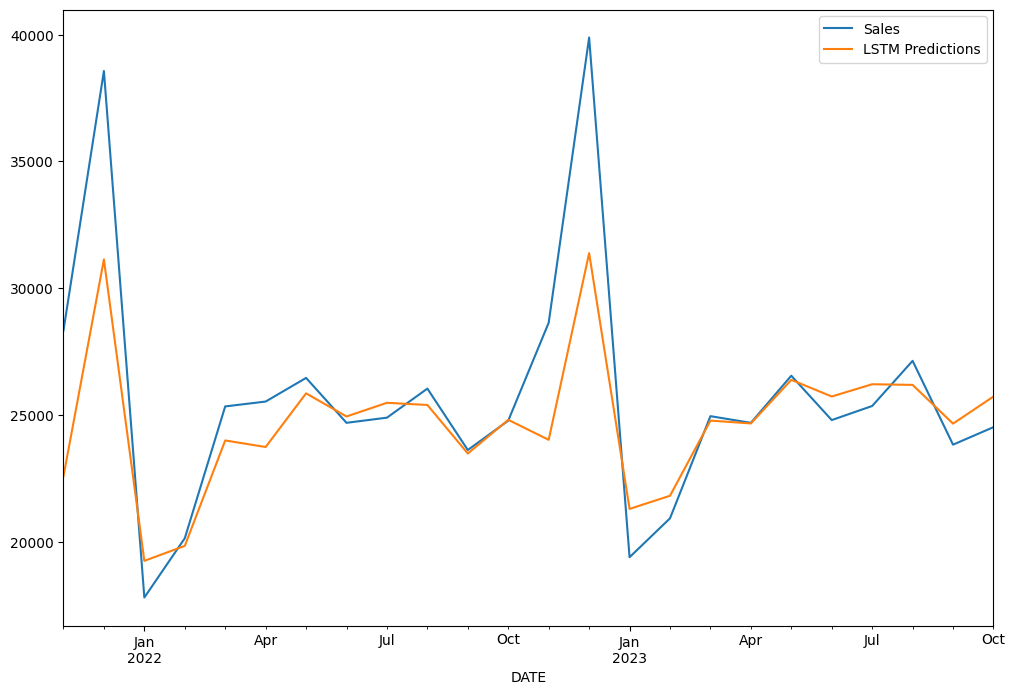

In [32]:
test_data.plot(figsize=(12, 8))

In [33]:
scaler = MinMaxScaler()

In [34]:
scaled_whole_dataset = scaler.fit_transform(df)

In [35]:
generator_for_the_whole_dataset = TimeseriesGenerator(scaled_whole_dataset, scaled_whole_dataset, length=length, batch_size=batch_size)

In [36]:
model = Sequential()

In [37]:
model.add(LSTM(128, activation='relu', input_shape=(length, n_features)))

model.add(Dense(1))

In [38]:
model.compile(optimizer='adam', loss='mse')

In [39]:
model.fit(generator_for_the_whole_dataset, epochs=8)

Epoch 1/8
185/185 [==============================] - 3s 7ms/step - loss: 0.0201
Epoch 2/8
185/185 [==============================] - 1s 7ms/step - loss: 0.0145
Epoch 3/8
185/185 [==============================] - 1s 6ms/step - loss: 0.0122
Epoch 4/8
185/185 [==============================] - 1s 7ms/step - loss: 0.0101
Epoch 5/8
185/185 [==============================] - 1s 8ms/step - loss: 0.0081
Epoch 6/8
185/185 [==============================] - 1s 6ms/step - loss: 0.0052
Epoch 7/8
185/185 [==============================] - 1s 6ms/step - loss: 0.0055
Epoch 8/8
185/185 [==============================] - 1s 7ms/step - loss: 0.0052


In [40]:
all_forecast = []

In [41]:
no_of_periods_to_be_predicted = 12

In [42]:
first_batch_to_be_evaluated = scaled_whole_dataset[-length:]

In [43]:
current_batch = first_batch_to_be_evaluated.reshape((1, length, n_features))

In [44]:
for i in range(no_of_periods_to_be_predicted):
    
    current_prediction = model.predict(current_batch)[0]
    
    all_forecast.append(current_prediction)
    
    current_batch = np.append(current_batch[:, 1:, :], [[current_prediction]], axis=1)

1/1 [==============================] - 0s 27ms/step


In [45]:
forecasts = scaler.inverse_transform(all_forecast)

In [46]:
df 

,Sales
DATE,
1992-01-01,6938.0
1992-02-01,7524.0
1992-03-01,8475.0
1992-04-01,9401.0
1992-05-01,9558.0
...,...
2023-06-01,24809.0
2023-07-01,25364.0
2023-08-01,27143.0


In [47]:
predicted_forecast_index = pd.date_range(start='2023-11-01', periods=no_of_periods_to_be_predicted, freq='MS')

In [48]:
predicted_forecast_df = pd.DataFrame(data=forecasts, index=predicted_forecast_index, columns=['Future Forecasts'])

In [49]:
predicted_forecast_df.sample(5)

,Future Forecasts
2024-03-01,27029.228635
2024-08-01,29492.520180
2023-12-01,45720.837849
2024-10-01,27444.905902
2024-06-01,27207.181592


<Axes: xlabel='DATE'>

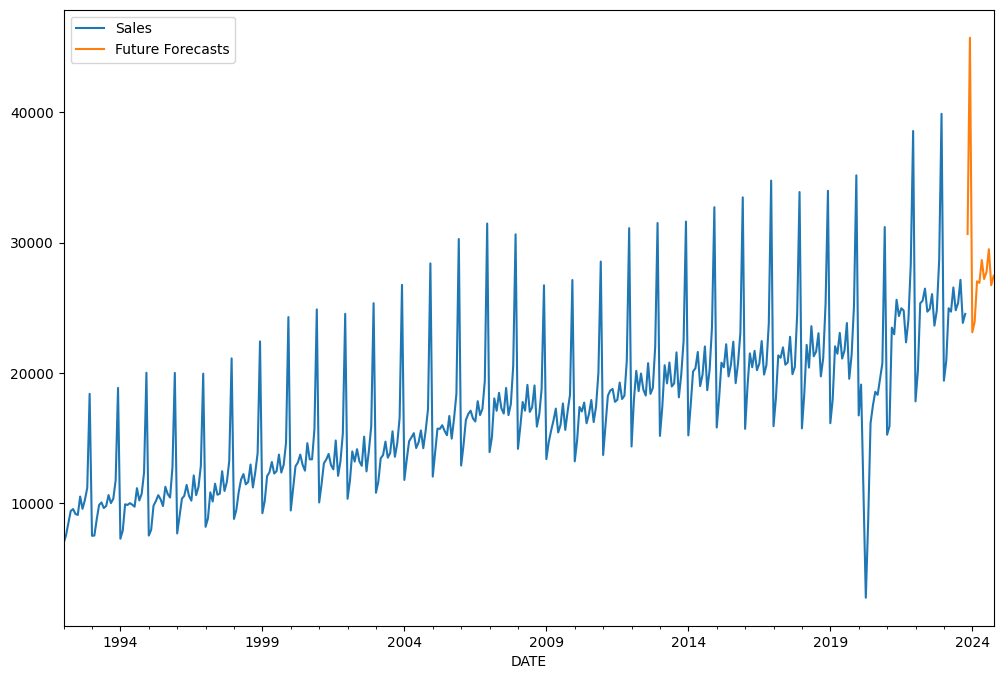

In [51]:
ax = df.plot()

predicted_forecast_df.plot(ax=ax, figsize=(12, 8))